# MIST / TSST Examples

In [7]:
from pathlib import Path

import re

import pandas as pd
import numpy as np

import biopsykit as bp
import biopsykit.saliva as saliva
from biopsykit.protocols import MIST, TSST, Stroop

import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib widget
%reload_ext autoreload
%autoreload 2

In [8]:
sns.set(style='ticks')

## MIST

In [3]:
mist = MIST()

In [5]:
saliva_mist = bp.example_data.get_saliva_example(saliva_times=[-30, -1, 30, 40, 50, 60, 70])
saliva_mist_mean = saliva.saliva_mean_se(saliva_mist, 'cortisol')

In [6]:
saliva_mist_mean

mean        se
sample condition    time                     
1      Control      -1.0   6.001982  1.089192
       Intervention -1.0   5.752271  0.823883
2      Control       30.0  5.966889  0.944473
       Intervention  30.0  4.882504  0.651206
3      Control       40.0  7.662025  1.252869
       Intervention  40.0  5.140364  0.699717
4      Control       50.0  7.666218  1.371916
       Intervention  50.0  5.223514  0.857657
5      Control       60.0  6.949896  1.293277
       Intervention  60.0  4.970175  0.847545
6      Control       70.0  5.923121  1.045103
       Intervention  70.0  4.655104  0.805322

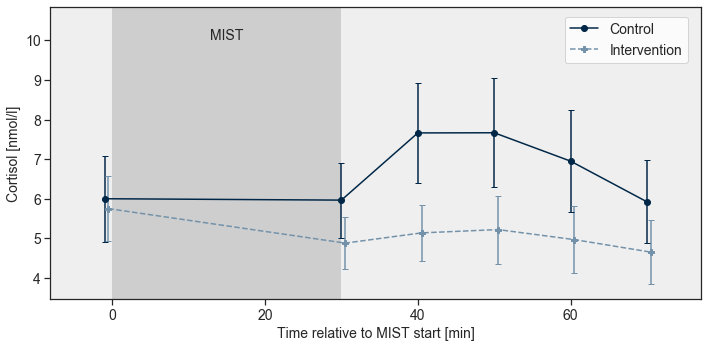

In [7]:
fig, ax = mist.saliva_plot(saliva_mist_mean, feature_name="cortisol", figsize=(10,5))
fig.tight_layout()

## TSST

In [8]:
tsst = TSST()

In [9]:
saliva_tsst_mean = bp.example_data.get_saliva_mean_se_example()

In [10]:
saliva_tsst_mean

{'cortisol':         mean     se
 time               
 0      8.004  1.021
 20    10.751  0.832
 30    14.330  1.230
 40    13.641  1.338
 65    10.549  1.036
 80     8.085  0.672
 140    6.626  0.479, 'amylase':          mean      se
 time                 
 0     106.381  16.885
 20    212.550  26.635
 30    169.303  24.481
 40    141.100  23.615
 65    161.343  26.427
 80    142.806  22.271
 140   140.917  22.424, 'il6':        mean     se
 time              
 0     0.702  0.112
 50    1.374  0.237
 140   4.011  0.722}

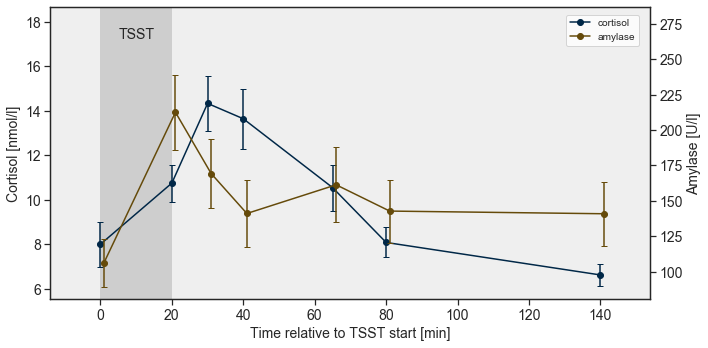

In [11]:
fig, ax = tsst.saliva_plot(saliva_tsst_mean, feature_name="cortisol", figsize=(10, 5))
tsst.saliva_plot(saliva_tsst_mean, feature_name="amylase", ax=ax)
tsst.saliva_plot_combine_legend(fig, ax, biomarkers=['cortisol', 'amylase'], separate_legends=False)
fig.tight_layout()

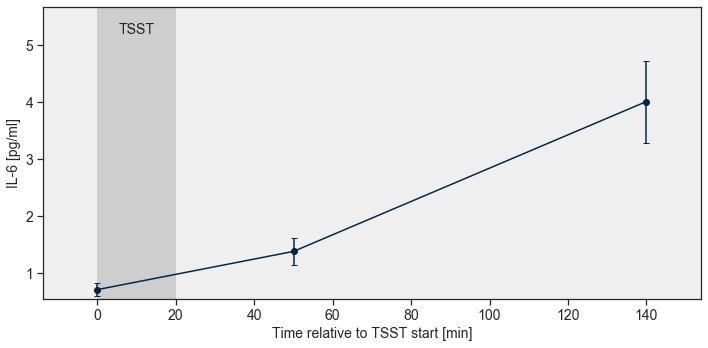

In [12]:
fig, ax = tsst.saliva_plot(saliva_tsst_mean, feature_name="il6", figsize=(10, 5))
fig.tight_layout()

## Stroop 

In [18]:
stroop = Stroop()

In [19]:
saliva_stroop = bp.example_data.get_saliva_example_stroop(saliva_times=[-15, -1, 10, 20])

In [20]:
saliva_stroop_mean = saliva.saliva_mean_se(saliva_stroop, 'cortisol')
saliva_stroop_mean

mean        se
sample condition    time                     
1      Control      -1.0   6.001982  1.089192
       Intervention -1.0   5.752271  0.823883
2      Control       10.0  5.966889  0.944473
       Intervention  10.0  4.882504  0.651206
3      Control       20.0  7.662025  1.252869
       Intervention  20.0  5.140364  0.699717

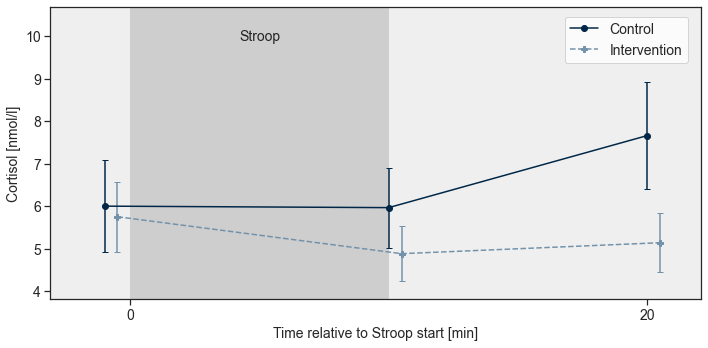

In [21]:
fig, ax = stroop.saliva_plot(saliva_stroop_mean, feature_name="cortisol", figsize=(10,5))
fig.tight_layout()